In [70]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import string
import re

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download("punkt")
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn import metrics

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [71]:
df = pd.read_csv("../data/raw/blogtext.csv")
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait unti..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewes van der Laag urlLink mail Ruiyu Xie ...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde: MAAK JE EIGEN WATERSTOFBOM How to build an H-...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can now 'capture' the URLs of popups...which means now...


In [72]:
print(df.shape)

(20000, 7)


In [73]:
#df = df.sample(n=50000, random_state=42)

In [74]:
print(df.columns) # for columns
print(df.index) # for row indexes

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')
RangeIndex(start=0, stop=20000, step=1)


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20000 non-null  int64 
 1   gender  20000 non-null  object
 2   age     20000 non-null  int64 
 3   topic   20000 non-null  object
 4   sign    20000 non-null  object
 5   date    20000 non-null  object
 6   text    20000 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.1+ MB


In [76]:
df.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [77]:
# Creating a new dataframe with two columns
df = df[["topic", "text"]]

In [78]:
pd.set_option("display.max_colwidth", 100)
df.head()

,topic,text
0,Student,"Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait unti..."
1,Student,These are the team members: Drewes van der Laag urlLink mail Ruiyu Xie ...
2,Student,In het kader van kernfusie op aarde: MAAK JE EIGEN WATERSTOFBOM How to build an H-...
3,Student,testing!!! testing!!!
4,InvestmentBanking,Thanks to Yahoo!'s Toolbar I can now 'capture' the URLs of popups...which means now...


In [79]:
# Checking how many unique topics are there
pd.DataFrame(df.topic.unique()).values

array([['Student'],
       ['InvestmentBanking'],
       ['indUnk'],
       ['Non-Profit'],
       ['Banking'],
       ['Education'],
       ['Engineering'],
       ['Science'],
       ['Communications-Media'],
       ['BusinessServices'],
       ['Sports-Recreation'],
       ['Arts'],
       ['Internet'],
       ['Museums-Libraries'],
       ['Accounting'],
       ['Technology'],
       ['Law'],
       ['Consulting'],
       ['Automotive'],
       ['Religion'],
       ['Fashion'],
       ['Publishing'],
       ['Marketing'],
       ['LawEnforcement-Security'],
       ['HumanResources'],
       ['Telecommunications'],
       ['Military'],
       ['Government'],
       ['Transportation'],
       ['Architecture'],
       ['Advertising'],
       ['Agriculture'],
       ['Biotech'],
       ['RealEstate'],
       ['Manufacturing'],
       ['Construction']], dtype=object)

In [80]:
df["topic"].value_counts().nlargest(10)

topic
indUnk                  7789
Technology              2989
Student                 2637
Fashion                 1622
Internet                 778
Education                759
Communications-Media     414
Arts                     358
Engineering              357
Marketing                207
Name: count, dtype: int64

In [112]:
df["topic_id"] = df["topic"].factorize()[0]

topic_id_df = df[["topic", "topic_id"]].drop_duplicates().sort_values("topic_id")

topic_to_id = dict(topic_id_df.values)
id_to_topic = dict(topic_id_df[["topic_id", "topic"]].values)

In [82]:
df.head()

,topic,text,topic_id
0,Student,"Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait unti...",0
1,Student,These are the team members: Drewes van der Laag urlLink mail Ruiyu Xie ...,0
2,Student,In het kader van kernfusie op aarde: MAAK JE EIGEN WATERSTOFBOM How to build an H-...,0
3,Student,testing!!! testing!!!,0
4,InvestmentBanking,Thanks to Yahoo!'s Toolbar I can now 'capture' the URLs of popups...which means now...,1


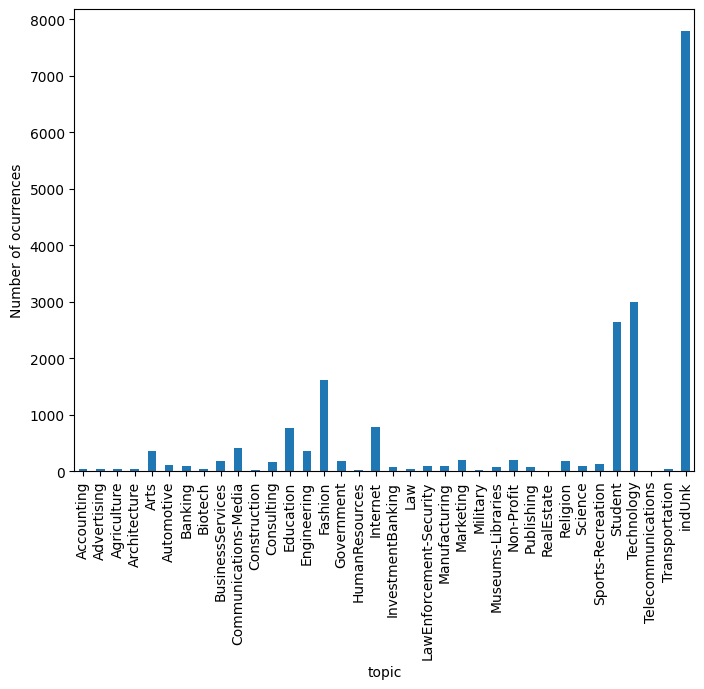

In [83]:
# Visualize the data

fig = plt.figure(figsize=(8,6))
df.groupby('topic').text.count().plot.bar(ylim=0)
plt.ylabel("Number of ocurrences", fontsize = 10);
plt.show()

In [84]:
# Pre-processing the "text" column
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [85]:
# removing punctuation

def remove_punctuation(text):
    text = "".join([c for c in text if c not in string.punctuation])
    return text

df["text"] = df["text"].apply(lambda x: remove_punctuation(x))
df.head()

,topic,text,topic_id
0,Student,Info has been found 100 pages and 45 MB of pdf files Now i have to wait untill our t...,0
1,Student,These are the team members Drewes van der Laag urlLink mail Ruiyu Xie ...,0
2,Student,In het kader van kernfusie op aarde MAAK JE EIGEN WATERSTOFBOM How to build an HBo...,0
3,Student,testing testing,0
4,InvestmentBanking,Thanks to Yahoos Toolbar I can now capture the URLs of popupswhich means now I can ...,1


In [86]:
# removing unwanted characters
df["text"] = df["text"].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', " ", x))
df.head()

,topic,text,topic_id
0,Student,Info has been found 100 pages and 45 MB of pdf files Now i have to wait untill our t...,0
1,Student,These are the team members Drewes van der Laag urlLink mail Ruiyu Xie ...,0
2,Student,In het kader van kernfusie op aarde MAAK JE EIGEN WATERSTOFBOM How to build an HBo...,0
3,Student,testing testing,0
4,InvestmentBanking,Thanks to Yahoos Toolbar I can now capture the URLs of popupswhich means now I can ...,1


In [87]:
# removing whitespaces (begining and trailing spaces)
df["text"] = df["text"].apply(lambda x: x.strip())
df.head()

,topic,text,topic_id
0,Student,Info has been found 100 pages and 45 MB of pdf files Now i have to wait untill our team leader ...,0
1,Student,These are the team members Drewes van der Laag urlLink mail Ruiyu Xie ...,0
2,Student,In het kader van kernfusie op aarde MAAK JE EIGEN WATERSTOFBOM How to build an HBomb From asc...,0
3,Student,testing testing,0
4,InvestmentBanking,Thanks to Yahoos Toolbar I can now capture the URLs of popupswhich means now I can show you some...,1


In [88]:
# replacing more than 1 spaces with single space
df["text"] = df["text"].str.replace(r"\s\s+", " ")
df.head()

,topic,text,topic_id
0,Student,Info has been found 100 pages and 45 MB of pdf files Now i have to wait untill our team leader ...,0
1,Student,These are the team members Drewes van der Laag urlLink mail Ruiyu Xie ...,0
2,Student,In het kader van kernfusie op aarde MAAK JE EIGEN WATERSTOFBOM How to build an HBomb From asc...,0
3,Student,testing testing,0
4,InvestmentBanking,Thanks to Yahoos Toolbar I can now capture the URLs of popupswhich means now I can show you some...,1


In [89]:
# tokenization
def tokenize(text):
    tokens = re.split("\W+", text)
    return tokens

df["text"] = df["text"].apply(lambda x: tokenize(x.lower()))
df.head()

,topic,text,topic_id
0,Student,"[info, has, been, found, 100, pages, and, 45, mb, of, pdf, files, now, i, have, to, wait, untill...",0
1,Student,"[these, are, the, team, members, drewes, van, der, laag, urllink, mail, ruiyu, xie, urllink, mai...",0
2,Student,"[in, het, kader, van, kernfusie, op, aarde, maak, je, eigen, waterstofbom, how, to, build, an, h...",0
3,Student,"[testing, testing]",0
4,InvestmentBanking,"[thanks, to, yahoos, toolbar, i, can, now, capture, the, urls, of, popupswhich, means, now, i, c...",1


In [90]:
# removing stopwords

stopwords = nltk.corpus.stopwords.words("english")
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [91]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

df["text"] = df["text"].apply(lambda x: remove_stopwords(x))
df.head()

,topic,text,topic_id
0,Student,"[info, found, 100, pages, 45, mb, pdf, files, wait, untill, team, leader, processed, learns, html]",0
1,Student,"[team, members, drewes, van, der, laag, urllink, mail, ruiyu, xie, urllink, mail, bryan, aalderi...",0
2,Student,"[het, kader, van, kernfusie, op, aarde, maak, je, eigen, waterstofbom, build, hbomb, ascotttarta...",0
3,Student,"[testing, testing]",0
4,InvestmentBanking,"[thanks, yahoos, toolbar, capture, urls, popupswhich, means, show, cool, links, korean, pop, kpo...",1


In [92]:
# lemmatization

wn = nltk.WordNetLemmatizer()

def lemmatization(text):
    text = [wn.lemmatize(word) for word in text]
    return " ".join(text)

df["text"] = df["text"].apply(lambda x: lemmatization(x))
df.head()

,topic,text,topic_id
0,Student,info found 100 page 45 mb pdf file wait untill team leader processed learns html,0
1,Student,team member drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering urllink mail,0
2,Student,het kader van kernfusie op aarde maak je eigen waterstofbom build hbomb ascotttartarusuwaeduau a...,0
3,Student,testing testing,0
4,InvestmentBanking,thanks yahoo toolbar capture url popupswhich mean show cool link korean pop kpop audio video wit...,1


In [93]:
# Further Text processing using TF-IDF

tfidf = TfidfVectorizer(sublinear_tf=True, max_features=5000, ngram_range=(1,3), stop_words="english")

# Transforming each text into a vector
features = tfidf.fit_transform(df.text).toarray()
labels = df.topic_id
print(features.shape)

(20000, 5000)


In [94]:
tfidf.vocabulary_

{'info': 2236,
 '100': 4,
 'page': 3150,
 '45': 59,
 'file': 1601,
 'wait': 4753,
 'team': 4344,
 'leader': 2532,
 'html': 2102,
 'member': 2829,
 'van': 4700,
 'urllink': 4675,
 'mail': 2737,
 'build': 582,
 'andrew': 212,
 'scott': 3858,
 'subject': 4232,
 'date': 1049,
 'organization': 3121,
 'university': 4658,
 'western': 4848,
 'australia': 329,
 'original': 3123,
 'dated': 1050,
 'november': 3044,
 'seven': 3921,
 'day': 1056,
 'article': 283,
 'added': 124,
 'text': 4378,
 'like': 2587,
 'gold': 1824,
 'missing': 2890,
 'responsible': 3700,
 'information': 2237,
 'little': 2642,
 'minor': 2875,
 'stolen': 4185,
 '10': 1,
 'making': 2761,
 'kind': 2425,
 'challenge': 692,
 'real': 3564,
 'american': 204,
 'seek': 3885,
 'want': 4772,
 'victim': 4715,
 'nuclear': 3045,
 'war': 4786,
 'effort': 1360,
 'active': 115,
 'bomb': 494,
 'shelter': 3946,
 'loser': 2696,
 'underground': 4638,
 'eating': 1342,
 'spam': 4095,
 'winner': 4880,
 'push': 3494,
 'button': 606,
 'big': 440,
 'st

In [95]:
# Finding the two most correlated terms with each of the sign categories
N = 3
for topic, topic_id in sorted(topic_to_id.items()):
    features_chi2 = chi2(features, labels == topic_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(" ")) == 1]
    bigrams = [v for v in feature_names if len(v.split(" ")) == 2]
    print("n-----> %s:" %(topic))
    print("  * Most Correlated Unigrams are: %s" %(", ".join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(", ".join(bigrams[-N:])))

n-----> Accounting:
  * Most Correlated Unigrams are: loving, bay, hindi
  * Most Correlated Bigrams are: best thing, going work, good job
n-----> Advertising:
  * Most Correlated Unigrams are: indecent, stern, fcc
  * Most Correlated Bigrams are: 438 726, supreme court, mr justice
n-----> Agriculture:
  * Most Correlated Unigrams are: van, brace, urllink
  * Most Correlated Bigrams are: la vega, good good, im waiting
n-----> Architecture:
  * Most Correlated Unigrams are: lakers, san, diego
  * Most Correlated Bigrams are: los angeles, like guy, san diego
n-----> Arts:
  * Most Correlated Unigrams are: tim, lli, ulli
  * Most Correlated Bigrams are: think going, way think, whats wrong
n-----> Automotive:
  * Most Correlated Unigrams are: series, abc, television
  * Most Correlated Bigrams are: bin laden, great deal, ive seen
n-----> Banking:
  * Most Correlated Unigrams are: brandon, mike, katie
  * Most Correlated Bigrams are: year ago, dont need, right im
n-----> Biotech:
  * Most C

In [105]:
X = df["text"] # Collection of blogs
y = df["topic_id"] # Target or the labels we want to predict (i.e. the different topics)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [107]:
# Model selection

models = [
    RandomForestClassifier(n_estimators=200, random_state=42),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=42),
]
# Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring="accuracy", cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=["model_name", "fold_idx", "accuracy"])

c:\users\rahul\pycharmprojects\naturallanguageprocessingproject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\rahul\pycharmprojects\naturallanguageprocessingproject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

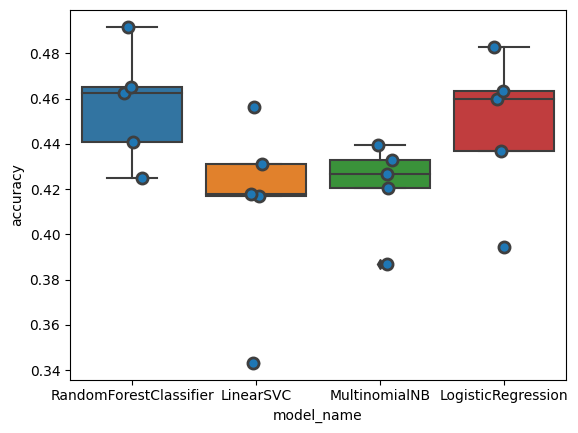

In [99]:
sns.boxplot(x="model_name", y="accuracy", data=cv_df)
sns.stripplot(x="model_name", y="accuracy", data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [108]:
# Compare Text Classification Model performance

mean_accuracy = cv_df.groupby("model_name").accuracy.mean()
std_accuracy = cv_df.groupby("model_name").accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis=1, ignore_index=True)
acc.columns = ["Mean Accuracy", "Standard deviation"]
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.41310,0.042191
LogisticRegression,0.44735,0.033881
MultinomialNB,0.42125,0.020552
RandomForestClassifier,0.45710,0.025426


In [109]:
# Evaluation of Text Classification Model

X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, labels, df.index, test_size=0.25, random_state=42)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy: %.4f" % accuracy_score(y_test, y_pred))

Accuracy: 0.5288


In [110]:
# Classification report
print(metrics.classification_report(y_test, y_pred, target_names=df["topic"].unique()))

                         precision    recall  f1-score   support

                Student       0.39      0.37      0.38       660
      InvestmentBanking       0.76      0.72      0.74        18
                 indUnk       0.56      0.71      0.63      1952
             Non-Profit       0.50      0.17      0.26        52
                Banking       0.50      0.04      0.08        23
              Education       0.58      0.36      0.45       206
            Engineering       0.32      0.09      0.14        75
                Science       0.78      0.25      0.38        28
   Communications-Media       0.37      0.42      0.40       102
       BusinessServices       0.56      0.13      0.21        38
      Sports-Recreation       0.67      0.35      0.46        23
                   Arts       0.65      0.36      0.46        84
               Internet       0.44      0.33      0.38       199
      Museums-Libraries       1.00      0.19      0.32        16
             Accounting 

c:\users\rahul\pycharmprojects\naturallanguageprocessingproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rahul\pycharmprojects\naturallanguageprocessingproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\rahul\pycharmprojects\naturallanguageprocessingproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

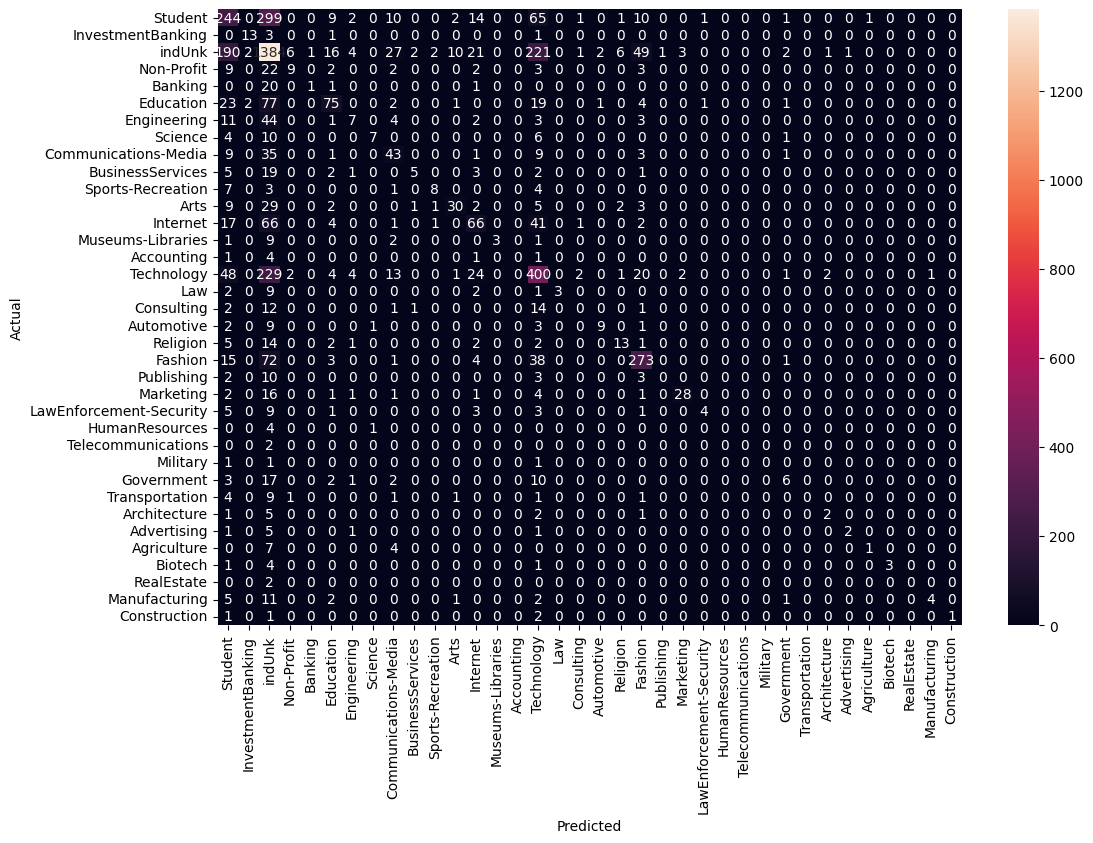

In [111]:
# Now let's plot the confusion matrix to check the miss classified predictions

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=topic_id_df.topic.values, yticklabels=topic_id_df.topic.values)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()